In [53]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import accuracy_score

In [54]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Разграничим наши данные для обучения и валидации

In [55]:
directory = 'data_2'
target_size = (48, 48)
batch_size = 32
class_mode = 'categorical'

In [56]:
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    directory=directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    directory=directory,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=class_mode,
    subset='validation'
)

Found 3966 images belonging to 4 classes.
Found 439 images belonging to 4 classes.


# Создаём модель CNN

In [57]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=target_size))
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [58]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

# Обучение и валидация модели

In [59]:
history = model.fit(train_generator, epochs=4, validation_data=validation_generator)

Epoch 1/4
124/124 [==============================] - 31s 238ms/step - loss: 1.1980 - acc: 0.4221 - val_loss: 0.8926 - val_acc: 0.6378
Epoch 2/4
124/124 [==============================] - 16s 132ms/step - loss: 0.8502 - acc: 0.6309 - val_loss: 0.9254 - val_acc: 0.6219
Epoch 3/4
124/124 [==============================] - 16s 129ms/step - loss: 0.7440 - acc: 0.6773 - val_loss: 0.6503 - val_acc: 0.7289
Epoch 4/4
124/124 [==============================] - 16s 130ms/step - loss: 0.6490 - acc: 0.7342 - val_loss: 0.6197 - val_acc: 0.7449


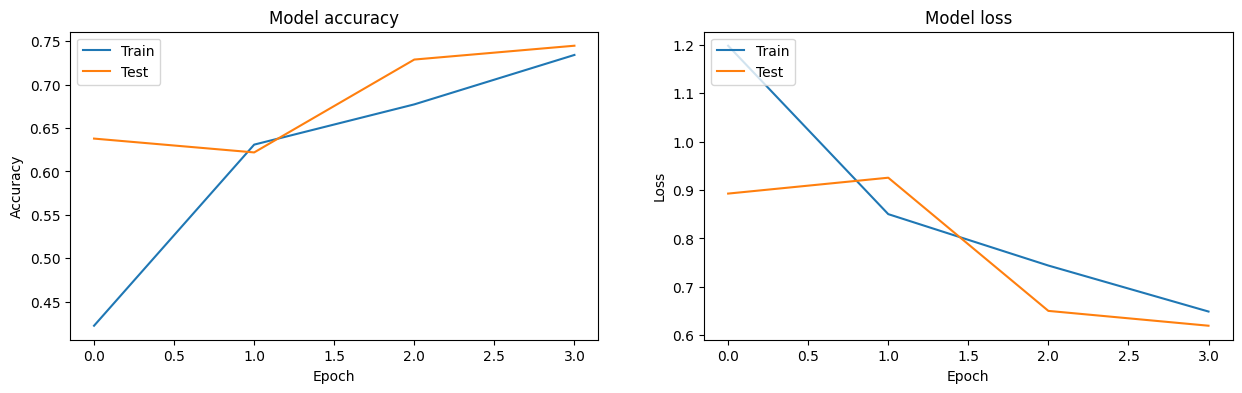

In [60]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [61]:
validation_predictions = model.predict(validation_generator)

predicted_labels = np.argmax(validation_predictions, axis=1)
true_labels = validation_generator.classes

overall_accuracy = accuracy_score(true_labels, predicted_labels)
print("Overall Accuracy:", overall_accuracy)

# Вычисляем точность для каждого класса
accuracy_per_class = {}
for class_idx in range(validation_generator.num_classes):
    class_samples = true_labels == class_idx
    class_accuracy = accuracy_score(true_labels[class_samples], predicted_labels[class_samples])
    accuracy_per_class[f'Class {class_idx}'] = class_accuracy

print("Accuracy per class:", accuracy_per_class)

14/14 [==============================] - 1s 56ms/step
Overall Accuracy: 0.2619589977220957
Accuracy per class: {'Class 0': 0.2815533980582524, 'Class 1': 0.24166666666666667, 'Class 2': 0.31896551724137934, 'Class 3': 0.2}
